In [13]:
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install statsmodels
!pip install seaborn

     |████████████████████████████████| 292 kB 4.9 MB/s eta 0:00:01


In [14]:
%matplotlib inline

In [15]:
import pandas as pd
import numpy as np

In [16]:
auto_price = pd.read_csv("Automobile_price_data_Raw.csv")
## Convert some columns to numeric values
cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']
auto_price[cols] = auto_price[cols].apply(pd.to_numeric, args=('coerce',))

In [17]:
## Remove rows with missing values
auto_price.dropna(axis = 0, inplace = True)

In [18]:
## Remove rows with missing values
auto_price.dropna(axis = 0, inplace = True)

In [19]:
## Create a column with new levels for the number of cylinders
auto_price['num-cylinders'] = ['four-or-less' if x in ['two', 'three', 'four'] else
 ('five-six' if x in ['five', 'six'] else
 'eight-twelve') for x in auto_price['num-of-cylinders']]
print(auto_price.dtypes)
auto_price.head(5)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
num-cylinders         object
dtype: object


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,num-cylinders
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,four-or-less
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,four-or-less
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,five-six
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,four-or-less
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,five-six


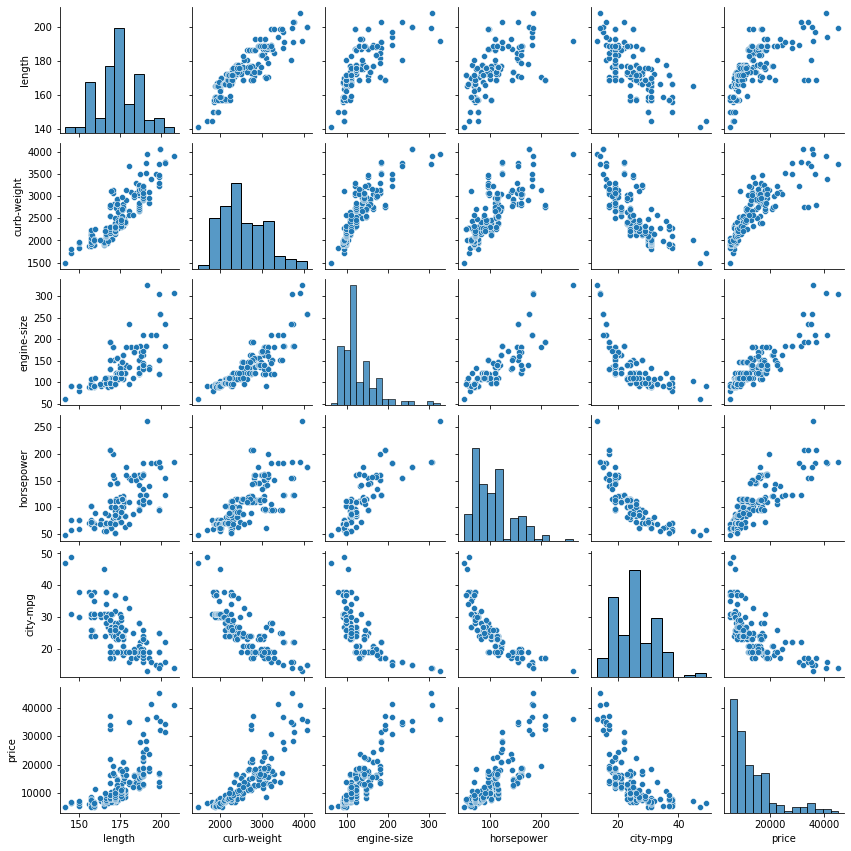

In [21]:
#Run the cell below to create a scatter plot matrix of the numeric features in the dataset.
import seaborn as sns
num_cols = ["length", "curb-weight", "engine-size", "horsepower", "city-mpg", "price", "fuel-type"]
sns.pairplot(auto_price[num_cols], height=2)

'drive-wheels'

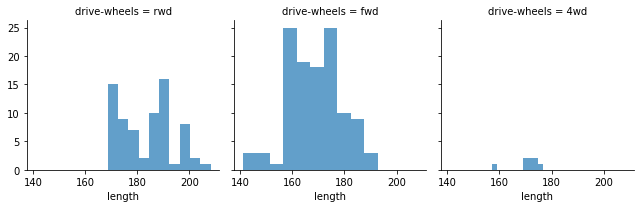

In [23]:
#Run the cell below to define a function that creates histograms for a specified column, conditioned on 
#the drive.wheel column; and then call the function for five features to see the results.

# Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
 import matplotlib.pyplot as plt
 import seaborn as sns
 ## Loop over the list of columns
 for col in plot_cols:
     grid1 = sns.FacetGrid(df, col=grid_col)
     grid1.map(plt.hist, col, alpha=.7)
     return grid_col

## Define columns for making a conditioned histogram
plot_cols2 = ["length",
 "curb-weight",
 "engine-size",
 "city-mpg",
 "price"]
cond_hists(auto_price, plot_cols2, 'drive-wheels')

'drive-wheels'

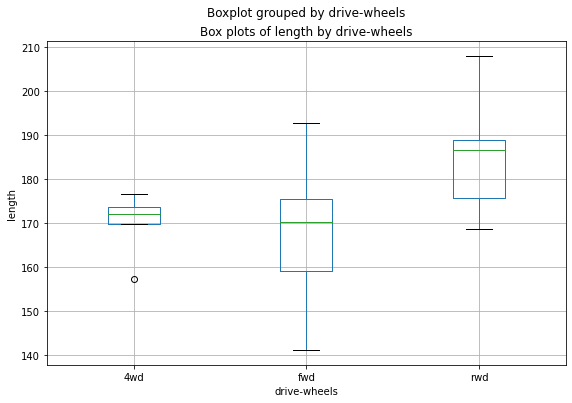

In [25]:
#Run the cell below to define a function that creates box plots conditioned on drive.wheels, and then 
#call the function for the same columns as the histograms above.

## Create boxplots of data
def auto_boxplot(df, plot_cols, by):
 import matplotlib.pyplot as plt
 for col in plot_cols:
     fig = plt.figure(figsize=(9, 6))
     ax = fig.gca()
     df.boxplot(column = col, by = by, ax = ax)
     ax.set_title('Box plots of ' + col + ' by ' + by)
     ax.set_ylabel(col)
     return by
auto_boxplot(auto_price, plot_cols2, "drive-wheels")

['length', 'curb-weight', 'engine-size', 'city-mpg']

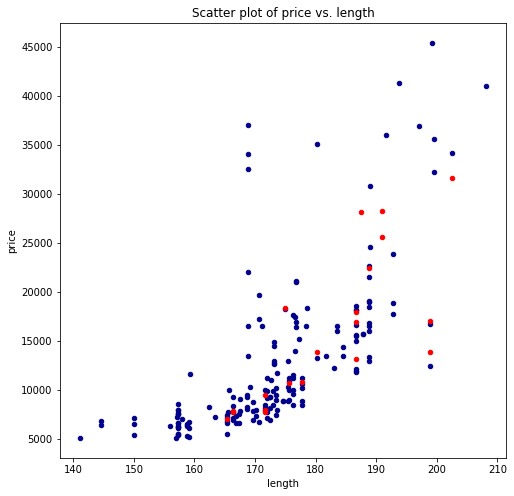

In [30]:
#Run the cell below to define a function that creates scatter plots showing price vs a specified column, 
#with color indicating the number of cylinders; and then call the function for four columns.

## Create scatter plot
def auto_scatter(df, plot_cols):
 import matplotlib.pyplot as plt
 for col in plot_cols:
     fig = plt.figure(figsize=(8, 8))
     ax = fig.gca()
     temp1 = df.loc[df['fuel-type'] == 'gas'] 
     temp2 = df.loc[df['fuel-type'] == 'diesel']
     if temp1.shape[0] > 0: 
         temp1.plot(kind = 'scatter', x = col, y = 'price' ,
         ax = ax, color = 'DarkBlue') 
     if temp2.shape[0] > 0: 
         temp2.plot(kind = 'scatter', x = col, y = 'price' ,
         ax = ax, color = 'Red')
         ax.set_title('Scatter plot of price vs. ' + col)
     return plot_cols
## Define columns for making scatter plots
plot_cols3 = ["length",
 "curb-weight",
 "engine-size",
 "city-mpg"]
auto_scatter(auto_price, plot_cols3)

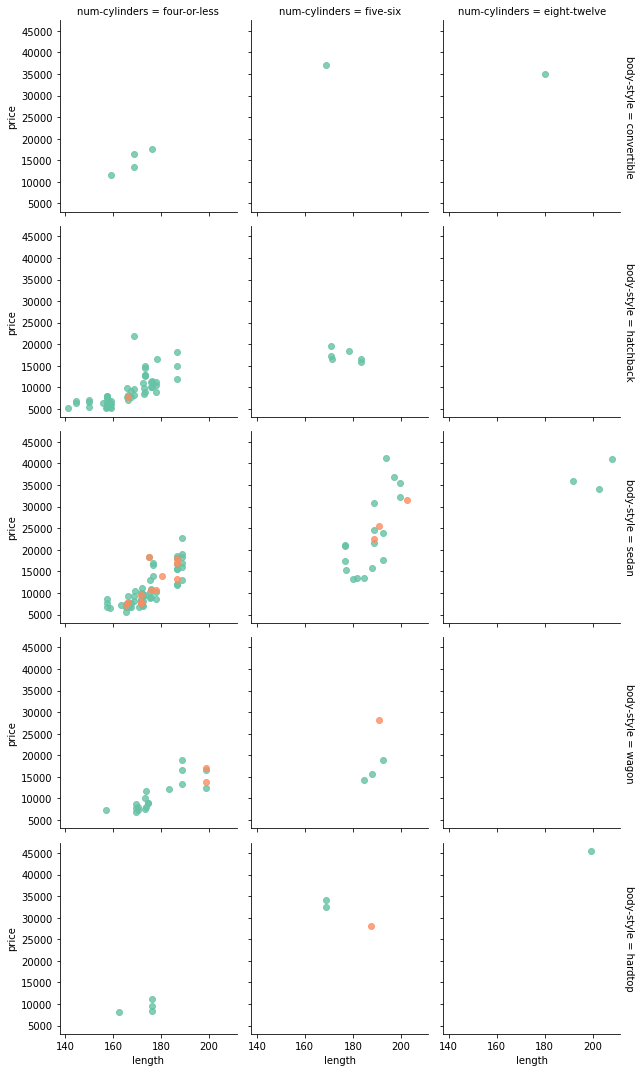

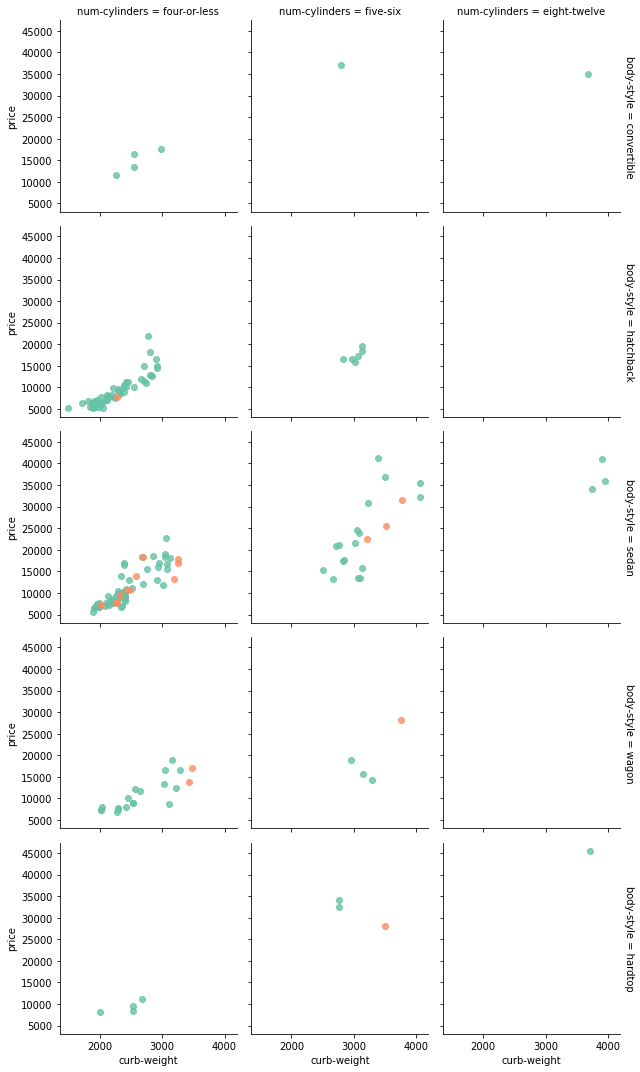

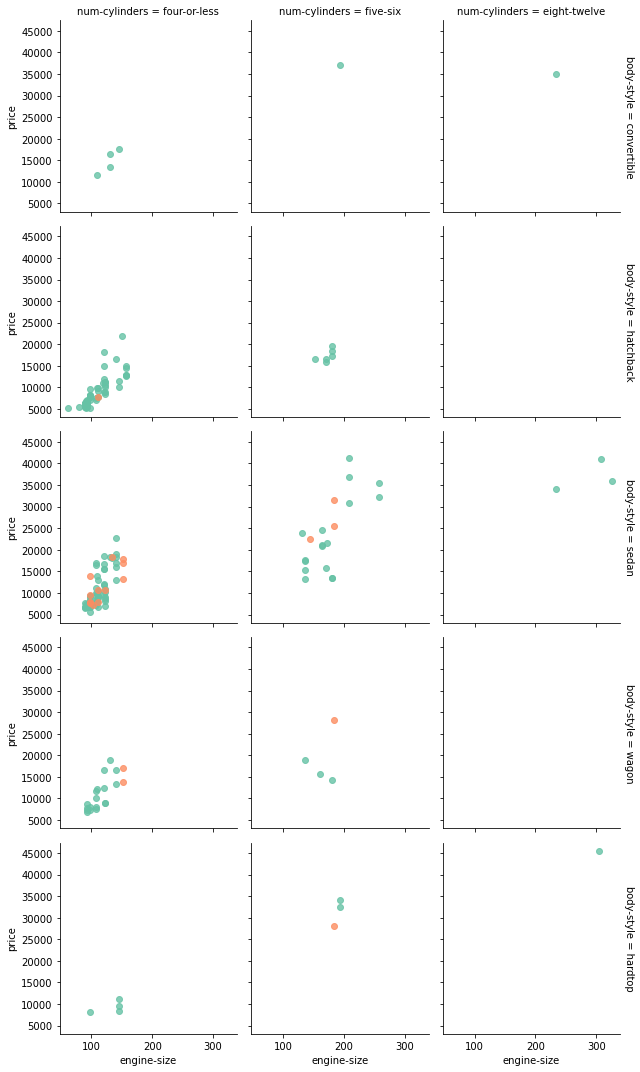

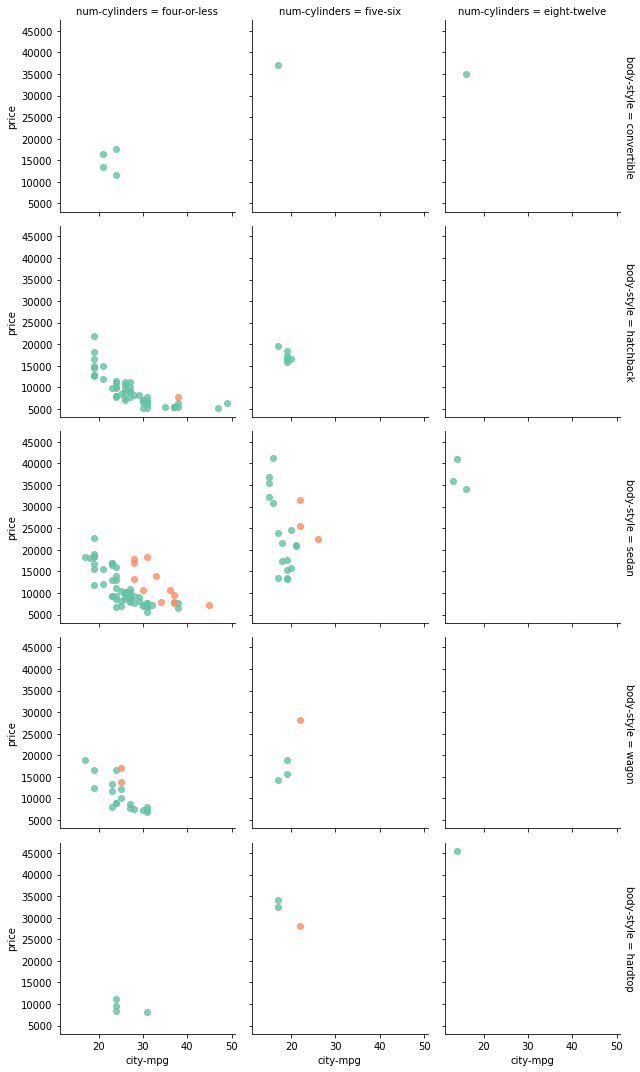

In [ ]:
#The code in the cell below uses the Python seaborn package to create a two dimensional array of 
#scatter plots.
def cond_plot(cols):
 import ipywidgets
 import seaborn as sns
 for col in cols:
     g = sns.FacetGrid(auto_price, col="num-cylinders", row = 'body-style',
     hue="fuel-type", palette="Set2", margin_titles=True)
     g.map(sns.regplot, col, "price", fit_reg = False)
# g.map(sns.regplot, "engine-size", "price", fit_reg = False)
cond_plot(plot_cols3)